<a href="https://colab.research.google.com/github/ernesc/masters_thesis_2022/blob/main/Stacked_LSTM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis Valve

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#imports
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import load_model
import tensorflow as tf
plt.style.use("ggplot")
from ipywidgets.widgets import interact, Layout

In [ ]:
def extract_data(filename, dataframe):
    
    import pandas as pd
    
    df_filename = pd.read_csv(filename,";")

    df_filename_lukket2 = pd.DataFrame()
    df_filename_lukket2 = df_filename_lukket2.append(df_filename[df_filename["Data Source"].str.contains("LUKKET")])
    df_filename_lukket = pd.DataFrame()
    df_filename_lukket = df_filename_lukket.append(df_filename_lukket2[df_filename_lukket2["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_lukket = df_filename_lukket.rename(columns={"Data Source": "data_source_lukket", 
                                          "Time": "time_lukket", 
                                          "Value": "value_lukket"})
    df_filename_lukket["time_lukket"] = pd.to_datetime(df_filename_lukket["time_lukket"])
    
    
    df_filename_apen1 = pd.DataFrame()
    df_filename_apen1 = df_filename_apen1.append(df_filename[df_filename["Data Source"].str.contains("APEN")])
    df_filename_apen = pd.DataFrame()
    df_filename_apen = df_filename_apen.append(df_filename_apen1[df_filename_apen1["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_apen = df_filename_apen.rename(columns={"Data Source": "data_source_apen", 
                                      "Time": "time_apen", 
                                      "Value": "value_apen"})
    df_filename_apen["time_apen"] = pd.to_datetime(df_filename_apen["time_apen"])
    
    df_filename_lukket.reset_index(inplace = True)
    df_filename_apen.reset_index(inplace=True)
    df_filename_lukket = df_filename_lukket.drop(columns="index")
    df_filename_apen = df_filename_apen.drop(columns="index")
    
    df_filename_apen['interval'] = pd.to_datetime(df_filename_apen['time_apen'])
    df_filename_lukket['interval'] = pd.to_datetime(df_filename_lukket['time_lukket'])
    
    df_filename_apen.sort_values(by=['interval'])
    df_filename_lukket.sort_values(by=['interval'])
    
    dataframe = pd.merge_asof(df_filename_apen, df_filename_lukket, on='interval', direction="nearest")
    
    
    dataframe["time_diff"] = dataframe["time_apen"] - dataframe["time_lukket"]
    
    dataframe["time_diff_sec"] = dataframe["time_diff"].dt.total_seconds()
    
    dataframe = dataframe.drop(dataframe[dataframe["time_diff_sec"] == 0].index)
    
    return dataframe

In [ ]:

data_2012_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2012.csv", 2012)
data_2013_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2013.csv", 2013)
data_2014_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2014.csv", 2014)
data_2015_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2015.csv", 2015)
data_2016_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2016.csv", 2016)
data_2017_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2017.csv", 2017)
data_2018_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2018.csv", 2018)
data_2019_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2019.csv", 2019)
data_2020_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2020.csv", 2020)
data_2021_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2021.csv", 2021)


frames = [data_2012_1, data_2013_1, data_2014_1, data_2015_1, data_2016_1, data_2017_1, data_2018_1, data_2019_1, data_2020_1, data_2021_1]

agg1 = pd.concat(frames)

data_2012_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2012.csv", 2012)
data_2013_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2013.csv", 2013)
data_2014_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2014.csv", 2014)
data_2015_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2015.csv", 2015)
data_2016_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2016.csv", 2016)
data_2017_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2017.csv", 2017)
data_2018_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2018.csv", 2018)
data_2019_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2019.csv", 2019)
data_2020_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2020.csv", 2020)
data_2021_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2021.csv", 2021)


frames = [data_2012_2, data_2013_2, data_2014_2, data_2015_2, data_2016_2, data_2017_2, data_2018_2, data_2019_2, data_2020_2, data_2021_2]

agg2 = pd.concat(frames)

data_2012_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2012.csv", 2012)
data_2013_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2013.csv", 2013)
data_2014_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2014.csv", 2014)
data_2015_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2015.csv", 2015)
data_2016_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2016.csv", 2016)
data_2017_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2017.csv", 2017)
data_2018_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2018.csv", 2018)
data_2019_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2019.csv", 2019)
data_2020_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2020.csv", 2020)
data_2021_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2021.csv", 2021)


frames = [data_2012_3, data_2013_3, data_2014_3, data_2015_3, data_2016_3, data_2017_3, data_2018_3, data_2019_3, data_2020_3, data_2021_3]

agg3 = pd.concat(frames)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: F

In [ ]:
agg1_close = agg1[agg1.time_diff_sec < 0]
agg1_open = agg1[agg1.time_diff_sec > 0]
agg1_open_v1 = agg1_open['time_diff_sec']
agg1_close_v1 = agg1_close['time_diff_sec']


agg2_close = agg2[agg2.time_diff_sec < 0]
agg2_open = agg2[agg2.time_diff_sec > 0]
agg2_open_v1 = agg2_open['time_diff_sec']
agg2_close_v1 = agg2_close['time_diff_sec']

agg3_close = agg3[agg3.time_diff_sec < 0]
agg3_open = agg3[agg3.time_diff_sec > 0]
agg3_open_v1 = agg3_open['time_diff_sec']
agg3_close_v1 = agg3_close['time_diff_sec']

In [ ]:
def remove_outliers_v1(data, cutoff):
    data_mean, data_std = np.mean(data), np.std(data)
    cut_off = data_std * cutoff
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier obs: %d' % len(outliers_removed))
    
    return outliers

In [ ]:
dataset = agg1_close_v1
# validation data is going to be the last 60 cycles
last = 100

In [ ]:
outliers = remove_outliers_v1(dataset, 3)

Identified outliers: 2
Non-outlier obs: 348


In [ ]:
dataset = dataset[~dataset.isin(outliers)]

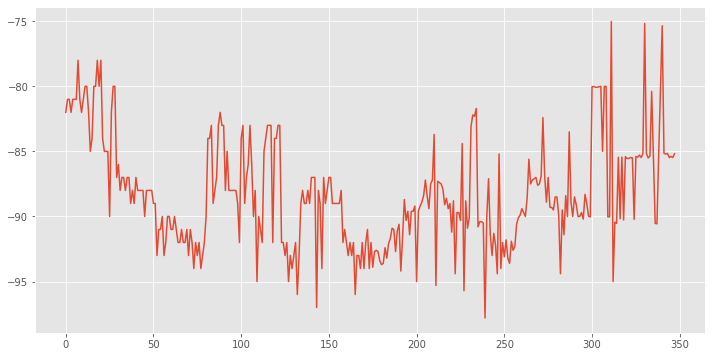

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(np.arange(0,len(dataset)),dataset)

In [ ]:
def sliding_window(data, window_size): 
  from numpy import array
  X, y = list(), list()
  for i in range(len(data)):
    # find the end of this pattern
    end_ix = i + window_size
    # check if we are beyond the sequence
    if end_ix > len(data)-1: 
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = data[i:end_ix], data[end_ix] 
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
n_steps = 40
# split into samples


X, y = sliding_window(list(dataset)[:len(dataset)-last], n_steps)
X_val, y_val = sliding_window(list(agg3_close_v1)[len(dataset)-last:], n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]


In [ ]:
cp = ModelCheckpoint('modellstmstc1c5/', save_best_only=True, monitor='val_root_mean_squared_error')
early_stopping = EarlyStopping(monitor='val_root_mean_squared_error', patience=200)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps,
n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
opt = Adam(learning_rate=.0001)
model.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
# fit model


history = model.fit(X, y, epochs=1000, validation_data=(X_val, y_val), batch_size=1,
                    verbose=1, callbacks=[cp, early_stopping])


Epoch 1/1000
206/208 [============================>.] - ETA: 0s - loss: 1363266.7500 - root_mean_squared_error: 1167.5901INFO:tensorflow:Assets written to: modellstmstc1c5/assets


208/208 [==============================] - 14s 57ms/step - loss: 1350528.7500 - root_mean_squared_error: 1162.1226 - val_loss: 334610.6250 - val_root_mean_squared_error: 578.4554
Epoch 2/1000
207/208 [============================>.] - ETA: 0s - loss: 129844.1641 - root_mean_squared_error: 360.3390INFO:tensorflow:Assets written to: modellstmstc1c5/assets


INFO:tensorflow:Assets written to: modellstmstc1c5/assets


208/208 [==============================] - 9s 42ms/step - loss: 129264.8438 - root_mean_squared_error: 359.5342 - val_loss: 111911.1797 - val_root_mean_squared_error: 334.5313
Epoch 3/1000
207/208 [============================>.] - ETA: 0s - loss: 9983.9355 - root_mean_squared_error: 99.9196  INFO:tensorflow:Assets written to: modellstmstc1c5/assets


INFO:tensorflow:Assets written to: modellstmstc1c5/assets


208/208 [==============================] - 9s 42ms/step - loss: 10009.8057 - root_mean_squared_error: 100.0490 - val_loss: 106891.5859 - val_root_mean_squared_error: 326.9428
Epoch 4/1000
208/208 [==============================] - 5s 25ms/step - loss: 9817.4893 - root_mean_squared_error: 99.0832 - val_loss: 116958.4766 - val_root_mean_squared_error: 341.9919
Epoch 5/1000
208/208 [==============================] - 6s 30ms/step - loss: 9405.8975 - root_mean_squared_error: 96.9840 - val_loss: 132990.3281 - val_root_mean_squared_error: 364.6784
Epoch 6/1000
208/208 [==============================] - 6s 31ms/step - loss: 16090.2949 - root_mean_squared_error: 126.8475 - val_loss: 125309.2188 - val_root_mean_squared_error: 353.9904
Epoch 7/1000
208/208 [==============================] - 5s 23ms/step - loss: 8275.1025 - root_mean_squared_error: 90.9676 - val_loss: 115377.4141 - val_root_mean_squared_error: 339.6725
Epoch 8/1000
208/208 [==============================] - 5s 23ms/step - loss: 76

INFO:tensorflow:Assets written to: modellstmstc1c5/assets


208/208 [==============================] - 9s 43ms/step - loss: 6670.2290 - root_mean_squared_error: 81.6715 - val_loss: 92796.3125 - val_root_mean_squared_error: 304.6249
Epoch 10/1000
208/208 [==============================] - 5s 24ms/step - loss: 6700.3281 - root_mean_squared_error: 81.8555 - val_loss: 135324.5156 - val_root_mean_squared_error: 367.8648
Epoch 11/1000
208/208 [==============================] - 5s 23ms/step - loss: 10086.8496 - root_mean_squared_error: 100.4333 - val_loss: 123377.0938 - val_root_mean_squared_error: 351.2508
Epoch 12/1000
208/208 [==============================] - 5s 24ms/step - loss: 14018.4424 - root_mean_squared_error: 118.3995 - val_loss: 109745.9609 - val_root_mean_squared_error: 331.2793
Epoch 13/1000
208/208 [==============================] - 5s 24ms/step - loss: 14473.3320 - root_mean_squared_error: 120.3052 - val_loss: 101679.2656 - val_root_mean_squared_error: 318.8719
Epoch 14/1000
208/208 [==============================] - 5s 25ms/step - lo

INFO:tensorflow:Assets written to: modellstmstc1c5/assets


208/208 [==============================] - 8s 40ms/step - loss: 9.2754 - root_mean_squared_error: 3.0456 - val_loss: 92388.0469 - val_root_mean_squared_error: 303.9540
Epoch 195/1000
208/208 [==============================] - 4s 22ms/step - loss: 9.7154 - root_mean_squared_error: 3.1170 - val_loss: 241561.1719 - val_root_mean_squared_error: 491.4887
Epoch 196/1000
208/208 [==============================] - 5s 23ms/step - loss: 8.8025 - root_mean_squared_error: 2.9669 - val_loss: 304042.0625 - val_root_mean_squared_error: 551.4001
Epoch 197/1000
208/208 [==============================] - 5s 24ms/step - loss: 9.4239 - root_mean_squared_error: 3.0698 - val_loss: 125104.6328 - val_root_mean_squared_error: 353.7013
Epoch 198/1000
208/208 [==============================] - 5s 22ms/step - loss: 9.3564 - root_mean_squared_error: 3.0588 - val_loss: 126093.9844 - val_root_mean_squared_error: 355.0971
Epoch 199/1000
208/208 [==============================] - 5s 23ms/step - loss: 10.2722 - root_me

INFO:tensorflow:Assets written to: modellstmstc1c5/assets


208/208 [==============================] - 8s 40ms/step - loss: 11.9797 - root_mean_squared_error: 3.4612 - val_loss: 58275.2422 - val_root_mean_squared_error: 241.4026
Epoch 222/1000
208/208 [==============================] - 5s 22ms/step - loss: 10.1744 - root_mean_squared_error: 3.1897 - val_loss: 378870.5312 - val_root_mean_squared_error: 615.5246
Epoch 223/1000
208/208 [==============================] - 5s 22ms/step - loss: 10.5183 - root_mean_squared_error: 3.2432 - val_loss: 146019.3594 - val_root_mean_squared_error: 382.1248
Epoch 224/1000
208/208 [==============================] - 5s 23ms/step - loss: 11.7531 - root_mean_squared_error: 3.4283 - val_loss: 74676.7578 - val_root_mean_squared_error: 273.2705
Epoch 225/1000
208/208 [==============================] - 5s 23ms/step - loss: 10.7236 - root_mean_squared_error: 3.2747 - val_loss: 161607.4062 - val_root_mean_squared_error: 402.0042
Epoch 226/1000
208/208 [==============================] - 5s 23ms/step - loss: 11.7250 - roo

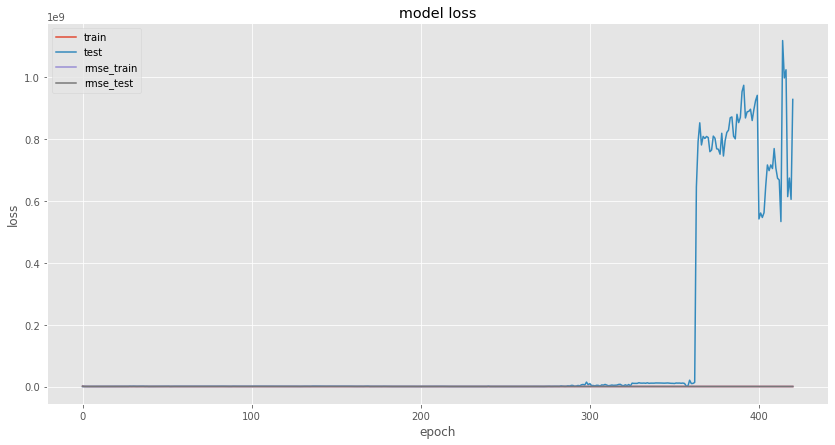

In [ ]:
plt.figure(figsize = (14,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'rmse_train', 'rmse_test'], loc='upper left')
plt.show()

In [ ]:
# demonstrate prediction for next cycles

model100 = load_model('modellstmstc1c5/')

x_input = np.array(list(dataset)[-n_steps-1:])
temp_input=list(x_input)
lst_output=[]
i=0
cycles = last
while(i<cycles):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model100.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model100.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    


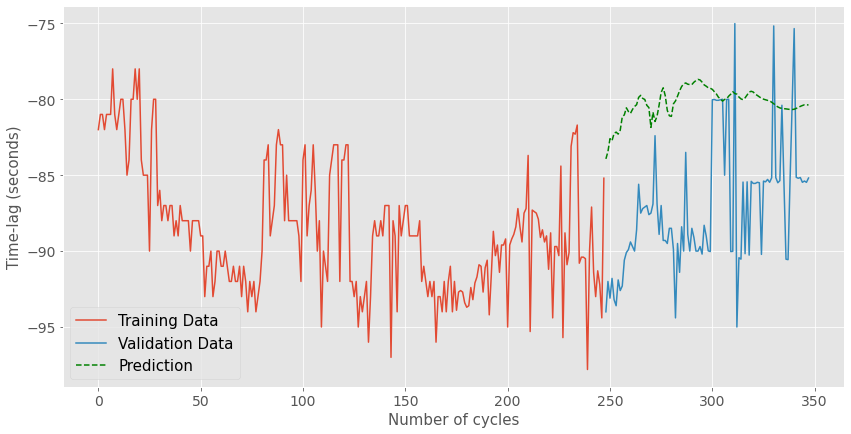

In [ ]:
new_cycle=np.arange(0,len(dataset)-last)
cycle_pred=np.arange(len(dataset)-last,len(dataset)-last+cycles)
plt.figure(figsize=(14,7))
plt.plot(new_cycle,list(dataset)[:len(dataset)-last], 
         label='Training Data')
plt.plot(np.arange(len(dataset)-last,len(dataset)), 
         list(dataset)[len(dataset)-last:], label='Validation Data', ls='-')
plt.plot(cycle_pred,lst_output, c='green', label='Prediction', ls='--')

plt.xlabel('Number of cycles', fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Time-lag (seconds)', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('/content/gdrive/My Drive/MASTER_data/StcLSTM_agg1_close.png')

In [ ]:
from tensorflow.keras.metrics import mean_squared_error
print(f'RMSE {np.sqrt(mean_squared_error(list(dataset)[len(dataset)-last:], lst_output))}')

RMSE 8.039153099060059
